In [1]:
# %%capture
#After this cell executes runtime will restart to finish the install, ignore and close the crash message, continue running cells starting with the one below
!pip install numpy==1.17.5;


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.0 MB 7.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.20.2 requires numpy>=1.18, but you have numpy 1.17.5 which is incompatible.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.17.5 which is incompatible.
tensorflow 2.8.2+zzzcolab20220527125636 requires numpy>=1.20, but you have numpy 1.17.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.17.5 which is incompatible.
kapre 0.3.7 requires numpy>=1.18.5, but you have numpy 1.17.5 which is incompatible.
jaxlib 0.3.14+cuda11.cudnn805 requires numpy>=1.19, but y

In [2]:
%tensorflow_version 1.x
!pip install tf_slim==1.1.0

After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 352 kB 29.6 MB/s 


In [3]:
# For faster training time, images should be resized to 300x300 and then annotated
# Images should contain the objects of interest at various scales, angles, lighting conditions, locations
# For acceptable results - mAP@0.5 of 0.9 the model was trained with batch size of 24
# and 5000 steps. this takes about 1h using 2 augmentations. 
# using 5 augmentations it takes about 2h 
num_steps = 20000  # A step means using a single batch of data. larger batch, less steps required
#Number of evaluation steps.
num_eval_steps = 10
#Batch size 24 is a setting that generally works well. can be changed higher or lower 
MODELS_CONFIG = {
        'ssd_mobilenet_v1': {
        'model_name': 'ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19',
        'pipeline_file': 'pipeline.config',
        'batch_size':16
    }
}
selected_model = 'ssd_mobilenet_v1'

# Name of the object detection model to use.
MODEL = MODELS_CONFIG[selected_model]['model_name']

# Name of the pipline file in tensorflow object detection API.
pipeline_file = MODELS_CONFIG[selected_model]['pipeline_file']

# Training batch size fits in Colab's GPU memory for selected model.
batch_size = MODELS_CONFIG[selected_model]['batch_size']

In [4]:
repo_url = 'https://github.com/luxonis/depthai-ml-training.git'
import os
%cd /content
repo_dir_path = "/content/depthai-ml-training"
!rm -rf {repo_dir_path}
!git clone {repo_url} {repo_dir_path}
%cd {repo_dir_path}
!git pull

/content
Cloning into '/content/depthai-ml-training'...
remote: Enumerating objects: 493, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 493 (delta 4), reused 4 (delta 1), pack-reused 455
Receiving objects: 100% (493/493), 100.97 MiB | 34.11 MiB/s, done.
Resolving deltas: 100% (236/236), done.
/content/depthai-ml-training
Already up to date.


In [5]:
!unzip /content/drive/MyDrive/ssd_mb_v2_files/images/images_new.zip -d /content/ 


Archive:  /content/drive/MyDrive/ssd_mb_v2_files/images/images_new.zip
   creating: /content/images_new/
   creating: /content/images_new/train/
  inflating: /content/images_new/train/person sitting in chair_32.xml  
  inflating: /content/images_new/train/person sitting in chair_36.xml  
  inflating: /content/images_new/train/person sitting in chair_38.xml  
  inflating: /content/images_new/train/person sitting in chair_39.xml  
  inflating: /content/images_new/train/person sitting in chair_41.xml  
  inflating: /content/images_new/train/person walking_24.xml  
  inflating: /content/images_new/train/person walking_25.xml  
  inflating: /content/images_new/train/person walking_27.xml  
  inflating: /content/images_new/train/person walking_32.xml  
  inflating: /content/images_new/train/person walking_37.xml  
  inflating: /content/images_new/train/person walking_42.xml  
  inflating: /content/images_new/train/person with cap_10.xml  
  inflating: /content/images_new/train/knife_1127.xml

In [6]:
# %%capture
%cd /content
!git clone --quiet https://github.com/tensorflow/models.git
%cd /content/models/
!git checkout 58d19c67e1d30d905dd5c6e5092348658fed80af
!apt-get update && apt-get install -y -qq protobuf-compiler python-pil python-lxml python-tk
!pip install -q Cython==0.29.28 contextlib2==0.5.5 pillow==7.1.2 lxml==4.2.6 matplotlib==3.2.2
!pip uninstall -y pycocotools
!pip install --no-cache-dir pycocotools==2.0.4
%cd /content/models/research
!protoc object_detection/protos/*.proto --python_out=.
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim/'
!python object_detection/builders/model_builder_test.py

/content
/content/models
Note: checking out '58d19c67e1d30d905dd5c6e5092348658fed80af'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 58d19c67e Internal change
Hit:1 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://ppa.launch

In [7]:
%cd /content/
# Convert train folder annotation xml files to a single csv file,
# generate the `label_map.pbtxt` file to `data/` directory as well.
!python depthai-ml-training/helpers/xml_to_csv.py -i /content/images_new/train/ -o /content/train_labels.csv -l /content
!python depthai-ml-training/helpers/xml_to_csv.py -i /content/images_new/test/ -o /content/test_labels.csv -l /content


/content
Successfully converted xml to csv.
Generate `/content/label_map.pbtxt`
Successfully converted xml to csv.
Generate `/content/label_map.pbtxt`


In [8]:
import pandas as pd 
train_df=pd.read_csv('/content/train_labels.csv')
train_df.drop(train_df.loc[train_df['filename']=='Fire9.jpg'].index, inplace=True)
train_df.to_csv('train_labels_new.csv')

In [ ]:
%cp /content/drive/MyDrive/ssd_mb_v2_files/train_labels.csv -d /content
%cp /content/drive/MyDrive/ssd_mb_v2_files/test_labels.csv -d /content
%cp /content/drive/MyDrive/ssd_mb_v2_files/label_map.pbtxt -d /content

In [9]:
%cd /content/
# Generate `train.record`
!python depthai-ml-training/helpers/generate_tfrecord.py --csv_input=/content/train_labels.csv --output_path=/content/train.record --img_path=/content/images_new/train --label_map /content/label_map.pbtxt

# Generate `test.record`
!python depthai-ml-training/helpers/generate_tfrecord.py --csv_input=/content/test_labels.csv --output_path=/content/test.record --img_path=/content/images_new/test --label_map /content/label_map.pbtxt



/content


W0715 09:59:09.599820 140246421071744 module_wrapper.py:139] From depthai-ml-training/helpers/generate_tfrecord.py:111: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0715 09:59:09.685518 140246421071744 module_wrapper.py:139] From depthai-ml-training/helpers/generate_tfrecord.py:57: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/train.record


W0715 09:59:12.583279 140485453989760 module_wrapper.py:139] From depthai-ml-training/helpers/generate_tfrecord.py:111: The name tf.python_io.TFRecordWriter is deprecated. Please use tf.io.TFRecordWriter instead.


W0715 09:59:12.620386 140485453989760 module_wrapper.py:139] From depthai-ml-training/helpers/generate_tfrecord.py:57: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.

Successfully created the TFRecords: /content/test.record


In [10]:
# Set the paths
test_record_fname = '/content/test.record'
train_record_fname = '/content/train.record'
label_map_pbtxt_fname = '/content/label_map.pbtxt'


In [11]:
%cd /content/
!wget http://download.tensorflow.org/models/object_detection/facessd_mobilenet_v2_quantized_320x320_open_image_v4.tar.gz
!tar xvf facessd_mobilenet_v2_quantized_320x320_open_image_v4.tar.gz

/content
--2022-07-15 10:03:29--  http://download.tensorflow.org/models/object_detection/facessd_mobilenet_v2_quantized_320x320_open_image_v4.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 172.217.164.176, 2607:f8b0:4004:815::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|172.217.164.176|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130655026 (125M) [application/x-tar]
Saving to: ‘facessd_mobilenet_v2_quantized_320x320_open_image_v4.tar.gz’

facessd_mobilenet_v 100%[===================>] 124.60M  98.8MB/s    in 1.3s    

2022-07-15 10:03:30 (98.8 MB/s) - ‘facessd_mobilenet_v2_quantized_320x320_open_image_v4.tar.gz’ saved [130655026/130655026]

facessd_mobilenet_v2_quantized_320x320_open_image_v4/
facessd_mobilenet_v2_quantized_320x320_open_image_v4/face_label_map.pbtxt
facessd_mobilenet_v2_quantized_320x320_open_image_v4/model.ckpt.data-00000-of-00001
facessd_mobilenet_v2_quantized_320x320_open_image_v4/model.ckpt.

In [ ]:
%cd /content/
#%rm -rf pretrained_model
%mkdir pretrained_model

%cd /content/pretrained_model
! wget http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz
! tar xvf ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz

/content
/content/pretrained_model
--2022-07-15 03:39:16--  http://download.tensorflow.org/models/object_detection/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.121.128, 2607:f8b0:4001:c16::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.121.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 156413934 (149M) [application/x-tar]
Saving to: ‘ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz’

ssdlite_mobiledet_e 100%[===================>] 149.17M   112MB/s    in 1.3s    

2022-07-15 03:39:18 (112 MB/s) - ‘ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19.tar.gz’ saved [156413934/156413934]

ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/model.ckpt-400000.data-00000-of-00001
ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/fp32/model.c

In [ ]:
%cp /content/pretrained_model/ssdlite_mobiledet_edgetpu_320x320_coco_2020_05_19/uint8/pipeline.config -d /content

In [12]:
DEST_DIR='/content/facessd_mobilenet_v2_quantized_320x320_open_image_v4/'
!echo {DEST_DIR}
!ls -alh {DEST_DIR}

/content/facessd_mobilenet_v2_quantized_320x320_open_image_v4/
total 184M
drwx------ 2 303230 5000 4.0K Oct  9  2018 .
drwxr-xr-x 1 root   root 4.0K Jul 15 10:03 ..
-rw------- 1 303230 5000   56 Oct  9  2018 face_label_map.pbtxt
-rw------- 1 303230 5000  83M Oct  9  2018 model.ckpt.data-00000-of-00001
-rw------- 1 303230 5000  68K Oct  9  2018 model.ckpt.index
-rw------- 1 303230 5000  21M Oct  9  2018 model.ckpt.meta
-rw------- 1 303230 5000 4.8K Oct  9  2018 pipeline.config
-rw------- 1 303230 5000  22M Oct  9  2018 tflite_graph.pb
-rw------- 1 303230 5000  60M Oct  9  2018 tflite_graph.pbtxt


In [13]:
#TF pretrained model checkpoint
fine_tune_checkpoint = os.path.join(DEST_DIR, "model.ckpt")
fine_tune_checkpoint

'/content/facessd_mobilenet_v2_quantized_320x320_open_image_v4/model.ckpt'

In [ ]:
fine_tune_checkpoint_new='/content/drive/MyDrive/ssd_mb_v2_files/training_ssd_faced_and_mbdet/model.ckpt-16330'

In [14]:
import os
#pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/', pipeline_file)
pipeline_fname='/content/facessd_mobilenet_v2_quantized_320x320_open_image_v4/pipeline.config'

assert os.path.isfile(pipeline_fname), '`{}` not exist'.format(pipeline_fname)
def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=29, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())

In [15]:
from pathlib import Path
parent = Path(label_map_pbtxt_fname).parent
!ls {parent}

depthai-ml-training
drive
facessd_mobilenet_v2_quantized_320x320_open_image_v4
facessd_mobilenet_v2_quantized_320x320_open_image_v4.tar.gz
images_new
label_map.pbtxt
models
sample_data
test_labels.csv
test.record
train_labels.csv
train_labels_new.csv
train.record


In [16]:
%cd /content/models/research

/content/models/research


In [17]:
import re
iou_threshold = 0.60

num_classes = get_num_classes(label_map_pbtxt_fname)
print(num_classes)
with open(pipeline_fname) as f:
    s = f.read()
with open(pipeline_fname, 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(train.record)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(val.record)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    # Set number of classes num_classes.
    s = re.sub('iou_threshold: [0-9].[0-9]+',
               'iou_threshold: {}'.format(iou_threshold), s)
    
   
    
    f.write(s)

15


In [ ]:
%rm  -rf '/content/training/'

In [ ]:
model_dir = '/content/training/'
# Optionally remove content in output model directory for a fresh start.
# !rm -rf {model_dir}
# os.makedirs(model_dir, exist_ok=True)
!python object_detection/model_main.py \
    --pipeline_config_path={pipeline_fname} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --num_eval_steps={num_eval_steps}

W0715 10:05:05.839197 140536431454080 model_lib.py:717] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_steps: 20000
I0715 10:05:05.839423 140536431454080 config_util.py:552] Maybe overwriting train_steps: 20000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0715 10:05:05.839520 140536431454080 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I0715 10:05:05.839604 140536431454080 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: 1
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I0715 10:05:05.839685 140536431454080 config_util.py:552] Maybe overwriting eval_num_epochs: 1
INFO:tensorflow:Maybe overwriting load_pretrained: True
I0715 10:05:05.839758 140536431454080 config_util.py:552] Maybe overwriting load_pretrained: True
INFO:tensorflow:Ignoring config override key: load_pretrained
I0715 10:05:05.839828 140536431454080 config_util.py

In [ ]:
import os

label_map_pbtxt_fname='/content/label_map.pbtxt'
#model_dir='/content/models/research/training/'
model_dir='/content/train/'
#output_directory = '/content/drive/MyDrive/ssd_mb_v2_files/fine_tuned_model'
output_directory ='/content/saved_model/'
#pipeline_fname = os.path.join('/content/models/research/object_detection/samples/configs/',pipeline_file)
# output_directory = '/content/gdrive/My\ Drive/data/'

In [ ]:
pipeline_fname='/content/inference_graph/pipeline.config'

In [ ]:
%%capture
import re
import numpy as np

#output_directory = './fine_tuned_model'
# output_directory = '/content/gdrive/My\ Drive/data/'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_inference_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={output_directory} \
    --trained_checkpoint_prefix={last_model_path}

In [ ]:
import os
pb_fname = os.path.join(os.path.abspath(output_directory), "frozen_inference_graph.pb")
assert os.path.isfile(pb_fname), '`{}` not exist'.format(pb_fname)
# !ls -alh {pb_fname}

In [ ]:
#!unzip /content/drive/MyDrive/ssd_mb_v2_files/inference_graph_base.zip -d /content/
#pb_fname="/content/inference_graph/frozen_inference_graph.pb"
num_classes=14

In [ ]:
import os
import glob

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = pb_fname

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = label_map_pbtxt_fname

# If you want to test the code with your images, just add images files to the PATH_TO_TEST_IMAGES_DIR.
PATH_TO_TEST_IMAGES_DIR =  "/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/"

assert os.path.isfile(pb_fname)
assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)

In [ ]:
%cd /content/models/research/object_detection

import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
# This is needed to display the images.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")
from object_detection.utils import ops as utils_ops

from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


detection_graph = tf.Graph()
with detection_graph.as_default():
    od_graph_def = tf.GraphDef()
    with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
        serialized_graph = fid.read()
        od_graph_def.ParseFromString(serialized_graph)
        tf.import_graph_def(od_graph_def, name='')


label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(
    label_map, max_num_classes=num_classes, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


def load_image_into_numpy_array(image):
    (im_width, im_height) = image.size
    return np.array(image.getdata()).reshape(
        (im_height, im_width, 3)).astype(np.uint8)

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


def run_inference_for_single_image(image, graph):
    with graph.as_default():
        with tf.Session() as sess:
            # Get handles to input and output tensors
            ops = tf.get_default_graph().get_operations()
            all_tensor_names = {
                output.name for op in ops for output in op.outputs}
            tensor_dict = {}
            for key in [
                'num_detections', 'detection_boxes', 'detection_scores',
                'detection_classes', 'detection_masks'
            ]:
                tensor_name = key + ':0'
                if tensor_name in all_tensor_names:
                    tensor_dict[key] = tf.get_default_graph().get_tensor_by_name(
                        tensor_name)
            if 'detection_masks' in tensor_dict:
                # The following processing is only for single image
                detection_boxes = tf.squeeze(
                    tensor_dict['detection_boxes'], [0])
                detection_masks = tf.squeeze(
                    tensor_dict['detection_masks'], [0])
                # Reframe is required to translate mask from box coordinates to image coordinates and fit the image size.
                real_num_detection = tf.cast(
                    tensor_dict['num_detections'][0], tf.int32)
                detection_boxes = tf.slice(detection_boxes, [0, 0], [
                                           real_num_detection, -1])
                detection_masks = tf.slice(detection_masks, [0, 0, 0], [
                                           real_num_detection, -1, -1])
                detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
                    detection_masks, detection_boxes, image.shape[0], image.shape[1])
                detection_masks_reframed = tf.cast(
                    tf.greater(detection_masks_reframed, 0.5), tf.uint8)
                # Follow the convention by adding back the batch dimension
                tensor_dict['detection_masks'] = tf.expand_dims(
                    detection_masks_reframed, 0)
            image_tensor = tf.get_default_graph().get_tensor_by_name('image_tensor:0')

            # Run inference
            output_dict = sess.run(tensor_dict,
                                   feed_dict={image_tensor: np.expand_dims(image, 0)})

            # all outputs are float32 numpy arrays, so convert types as appropriate
            output_dict['num_detections'] = int(
                output_dict['num_detections'][0])
            output_dict['detection_classes'] = output_dict[
                'detection_classes'][0].astype(np.uint8)
            output_dict['detection_boxes'] = output_dict['detection_boxes'][0]
            output_dict['detection_scores'] = output_dict['detection_scores'][0]
            if 'detection_masks' in output_dict:
                output_dict['detection_masks'] = output_dict['detection_masks'][0]
    return output_dict

/content/models/research/object_detection


/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/Fire1.jpg


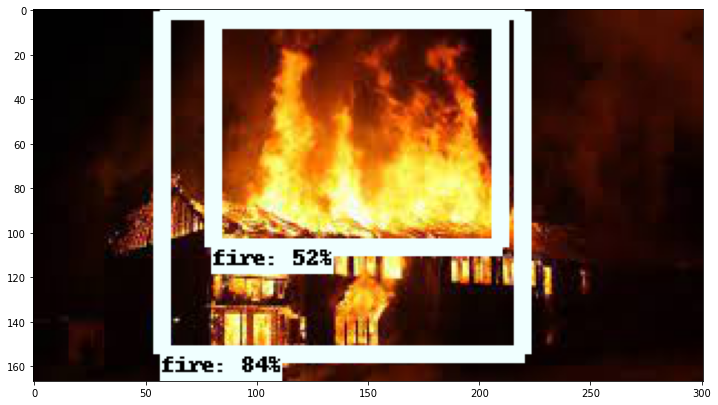

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/Fire2.jpg


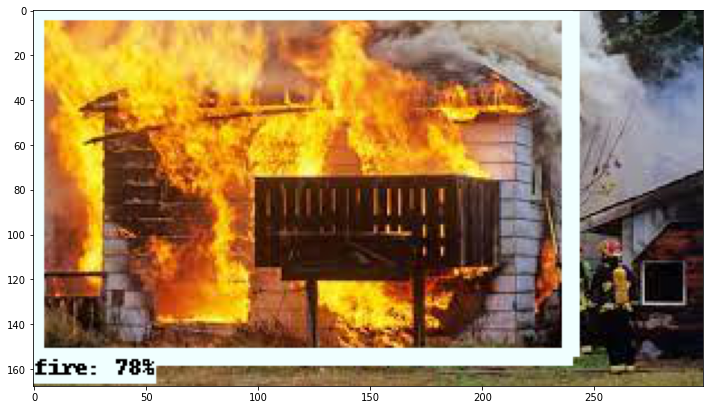

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/Fire3.jpg


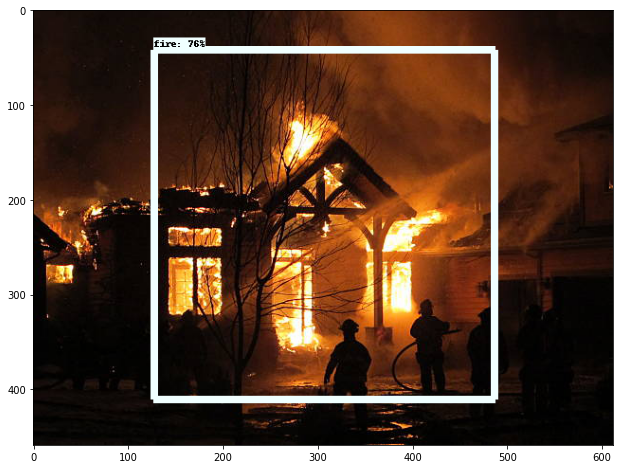

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/petrol1.jpg


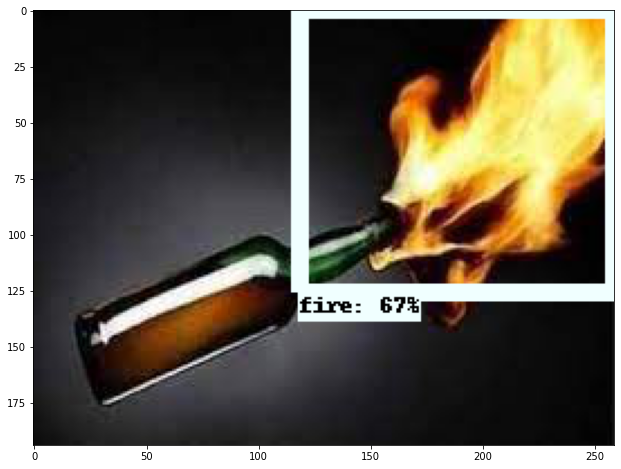

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/petrol2.jpg


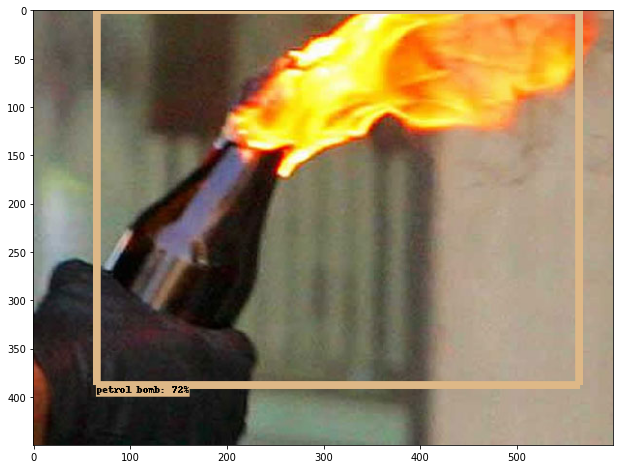

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/petrol3.jpg


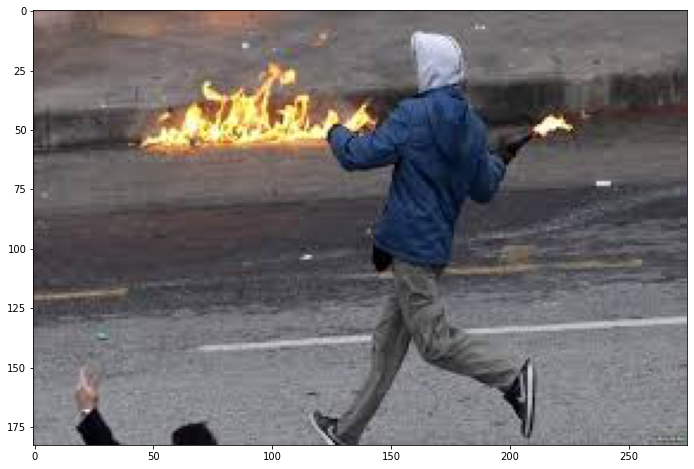

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/traffic1.jpg


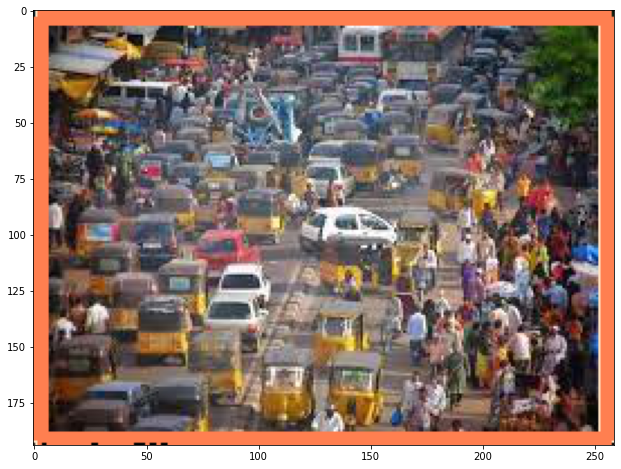

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/traffic2.jpg


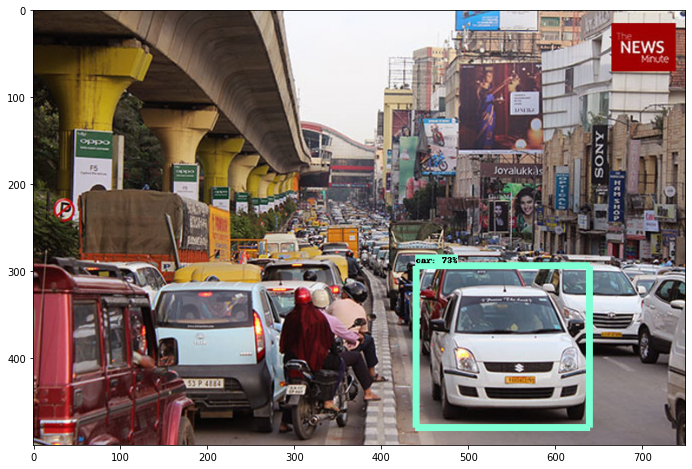

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/index.jpg


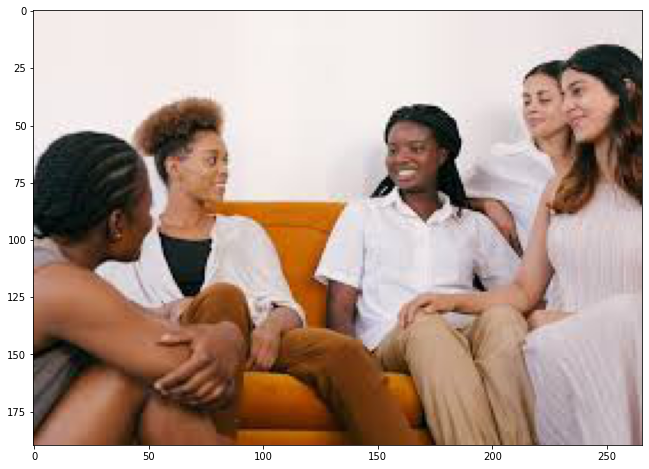

/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/index2.jpg


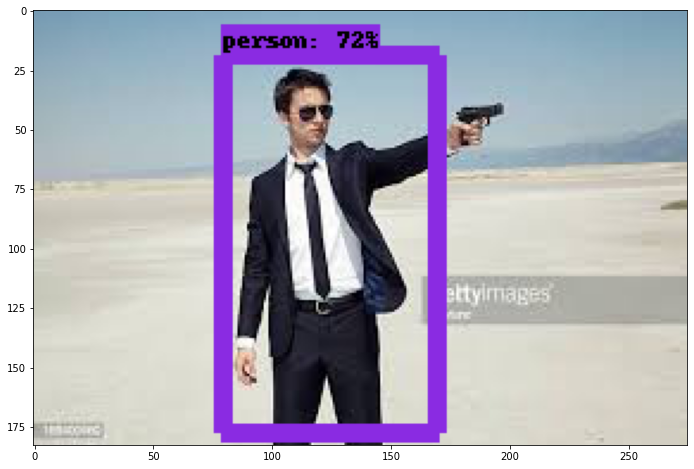

In [ ]:
# Visualize the results
%matplotlib inline
plt.close('all')
for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  print(image_path)
  # the array based representation of the image will be used later in order to prepare the
  # result image with boxes and labels on it.
  image_np = load_image_into_numpy_array(image)
  # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
  image_np_expanded = np.expand_dims(image_np, axis=0)
  # Actual detection.
  output_dict = run_inference_for_single_image(image_np, detection_graph)
  # Visualization of the results of a detection.
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks'),
      use_normalized_coordinates=True,
      line_thickness=8)
  plt.figure(figsize=IMAGE_SIZE)
  plt.imshow(image_np)
  plt.show()

In [ ]:
#model dir check for the trained model
%cd /content/models/research
!ls {model_dir}

/content/models/research
checkpoint
eval_0
events.out.tfevents.1656070518.4261f93ce93e
export
graph.pbtxt
model.ckpt-0.data-00000-of-00001
model.ckpt-0.index
model.ckpt-0.meta
model.ckpt-1365.data-00000-of-00001
model.ckpt-1365.index
model.ckpt-1365.meta
model.ckpt-2664.data-00000-of-00001
model.ckpt-2664.index
model.ckpt-2664.meta
model.ckpt-3953.data-00000-of-00001
model.ckpt-3953.index
model.ckpt-3953.meta
model.ckpt-5000.data-00000-of-00001
model.ckpt-5000.index
model.ckpt-5000.meta


In [ ]:
%cd /content
%rm -rf train
!unzip /content/drive/MyDrive/ssd_mb_v2_files/train-20220714T112244Z-001.zip -d /content/

/content
Archive:  /content/drive/MyDrive/ssd_mb_v2_files/train-20220714T112244Z-001.zip
  inflating: /content/train/model.ckpt-24879.index  
  inflating: /content/train/checkpoint  
  inflating: /content/train/model.ckpt-25000.index  
  inflating: /content/train/events.out.tfevents.1657702523.63ed4fdce664  
  inflating: /content/train/events.out.tfevents.1657704016.0a8a550caaf6  
  inflating: /content/train/events.out.tfevents.1657702730.63ed4fdce664  
  inflating: /content/train/graph.pbtxt  
  inflating: /content/train/events.out.tfevents.1657704198.0a8a550caaf6  
  inflating: /content/train/model.ckpt-24879.meta  
  inflating: /content/train/events.out.tfevents.1657792358.186972f051a0  
  inflating: /content/train/model.ckpt-25000.data-00000-of-00001  
  inflating: /content/train/events.out.tfevents.1657703472.0a8a550caaf6  
  inflating: /content/train/events.out.tfevents.1657610650.d7e393a9bb87  
  inflating: /content/train/model.ckpt-24879.data-00000-of-00001  
  inflating: /cont

In [ ]:
%%capture
import re
import numpy as np


ouput_dir_tflite = '/content/tflite_model/'
# output_directory = '/content/gdrive/My\ Drive/data/'

lst = os.listdir(model_dir)
lst = [l for l in lst if 'model.ckpt-' in l and '.meta' in l]
steps=np.array([int(re.findall('\d+', l)[0]) for l in lst])
last_model = lst[steps.argmax()].replace('.meta', '')

last_model_path = os.path.join(model_dir, last_model)
print(last_model_path)
!python /content/models/research/object_detection/export_tflite_ssd_graph.py \
    --input_type=image_tensor \
    --pipeline_config_path={pipeline_fname} \
    --output_directory={ouput_dir_tflite} \
    --trained_checkpoint_prefix={last_model_path}

In [ ]:
# Convert to a tflite file (for CPU)
%cd /content/models/research
! tflite_convert \
  --output_file="/content/mbdet1-base.tflite" \
  --graph_def_file="/content/tflite_model/tflite_graph.pb" \
  --inference_type=QUANTIZED_UINT8 \
  --input_arrays="normalized_input_image_tensor" \
  --output_arrays="TFLite_Detection_PostProcess,TFLite_Detection_PostProcess:1,TFLite_Detection_PostProcess:2,TFLite_Detection_PostProcess:3" \
  --mean_values=128 \
  --std_dev_values=128 \
  --input_shapes=1,320,320,3 \
  --allow_custom_ops \
  --default_ranges_min=0 \
  --default_ranges_max=6 \
 

/content/models/research
2022-07-14 11:35:52.672561: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-07-14 11:35:52.678370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-14 11:35:52.678891: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2022-07-14 11:35:52.679150: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-07-14 11:35:52.680653: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-14 11:35:52.681742: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic lib

In [ ]:
import os
import shutil
import glob
import urllib.request
import tarfile

In [ ]:
PATH_TO_TEST_IMAGES_DIR =  "/content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/"

#assert os.path.isfile(pb_fname)
#assert os.path.isfile(PATH_TO_LABELS)
TEST_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TEST_IMAGES_DIR, "*.*"))
assert len(TEST_IMAGE_PATHS) > 0, 'No image found in `{}`.'.format(PATH_TO_TEST_IMAGES_DIR)

In [ ]:
import os
import re
import numpy as np
from PIL import Image
from PIL import ImageDraw
%matplotlib inline
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
# This is needed to display the images.
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image



# Creates tflite interpreter
interpreter = tf.lite.Interpreter('/content/mbdet1-base.tflite')
interpreter.allocate_tensors()
interpreter.invoke() # warmup
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
width = input_details[0]['shape'][2]
height = input_details[0]['shape'][1]

def read_label_file(file_path):
  with open(file_path, 'r', encoding='utf-8') as f:
    lines = f.readlines()
  ret = {}
  for row_number, content in enumerate(lines):
    pair = re.split(r'[:\s]+', content.strip(), maxsplit=1)
    if len(pair) == 2 and pair[0].strip().isdigit():
      ret[int(pair[0])] = pair[1].strip()
    else:
      ret[row_number] = content.strip()
  return ret

def run_inference(interpreter, image):
  interpreter.set_tensor(input_details[0]['index'], image)
  interpreter.invoke()
  boxes = interpreter.get_tensor(output_details[0]['index'])[0]
  classes = interpreter.get_tensor(output_details[1]['index'])[0]
  scores = interpreter.get_tensor(output_details[2]['index'])[0]
  # num_detections = interpreter.get_tensor(output_details[3]['index'])[0]
  return boxes, classes, scores

for image_path in TEST_IMAGE_PATHS:
  image = Image.open(image_path)
  print('Evaluating:', image_path)
  image = Image.open(image_path)
  image_width, image_height = image.size
  draw = ImageDraw.Draw(image)
  resized_image = image.resize((width, height))
  np_image = np.asarray(resized_image)
  input_tensor = np.expand_dims(np_image, axis=0)
  # Run inference
  boxes, classes, scores = run_inference(interpreter, input_tensor)
  print(classes)
  
  # Draw results on image
  colors = {0:(128, 255, 102), 1:(102, 255, 255)}
  labels = read_label_file('/content/drive/MyDrive/ssd_mb_v2_files/label_map.txt')
  for i in range(len(boxes)):
    if scores[i] > .7:
      ymin = int(max(1, (boxes[i][0] * image_height)))
      xmin = int(max(1, (boxes[i][1] * image_width)))
      ymax = int(min(image_height, (boxes[i][2] * image_height)))
      xmax = int(min(image_width, (boxes[i][3] * image_width)))
      draw.rectangle((xmin, ymin, xmax, ymax), width=7, outline=colors[int(classes[i])])
      draw.rectangle((xmin, ymin, xmax, ymin-10), fill=colors[int(classes[i])])
      text = labels[int(classes[i])] + ' ' + str(scores[i]*100) + '%'
     
      draw.text((xmin+2, ymin-10), text, fill=(0,0,0), width=2)
  display(image)


Evaluating: /content/drive/MyDrive/ssd_mb_v2_files/Test_Folder/Test_Folder/Fire1.jpg
[ 3.  3.  3. 10.  3.  3.  3.  3.  3.  3.]


KeyError: ignored